In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold

# Exploring Dataset

In [2]:
track_data = pd.read_csv("fma-rock-vs-hiphop.csv")

In [3]:
track_data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

<AxesSubplot:>

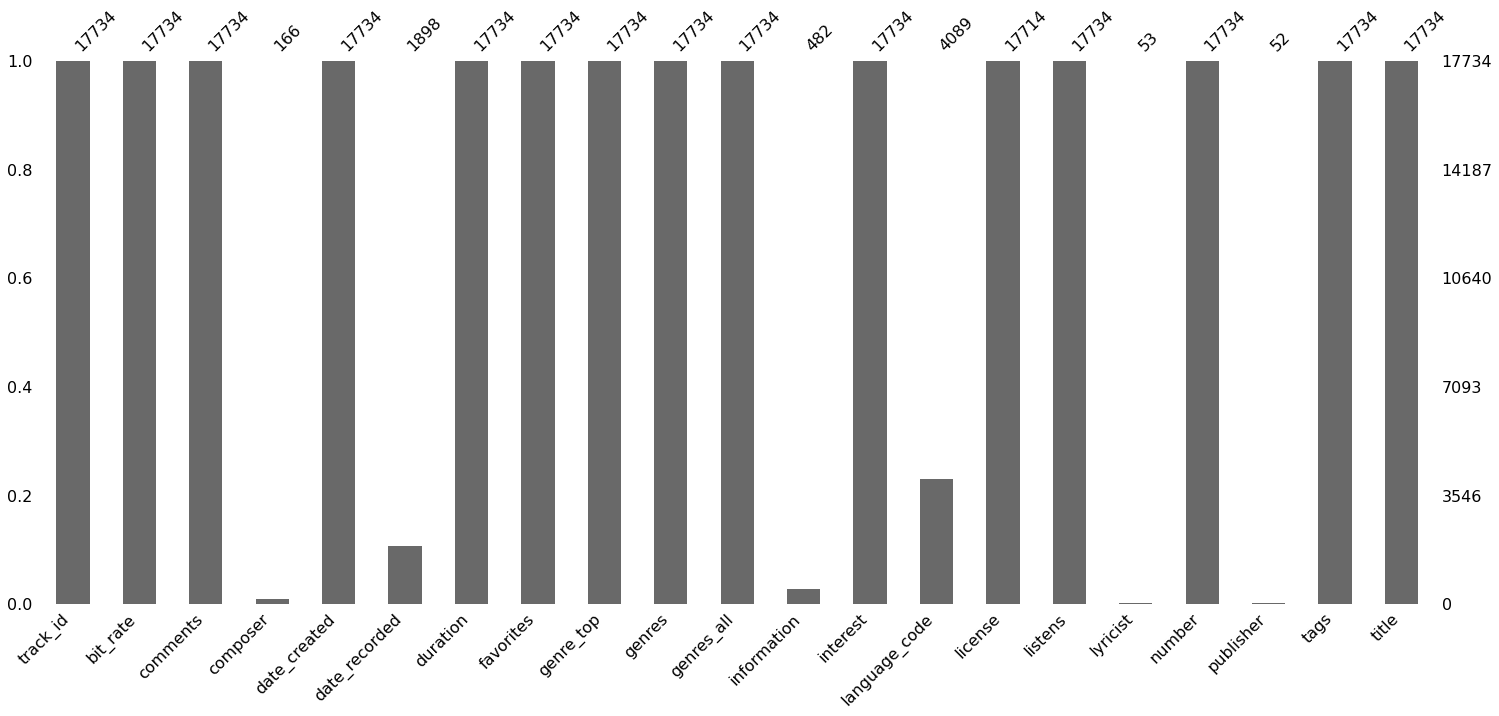

In [5]:
msno.bar(track_data)

In [6]:
track_metrics = pd.read_json("echonest-metrics.json")
track_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [7]:
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


<AxesSubplot:>

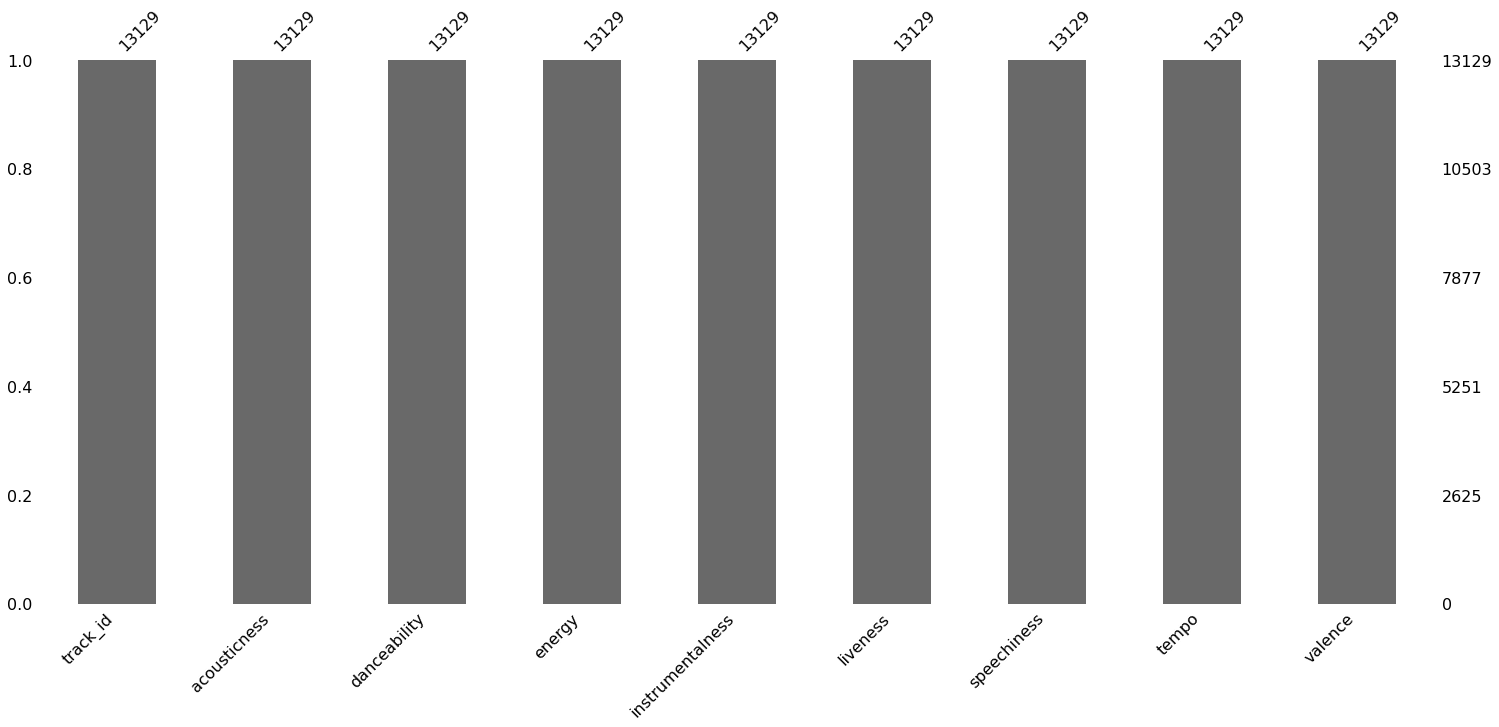

In [8]:
msno.bar(track_metrics)

## Merging DataFrame to get Features of tracks according to their TrackIDs

In [9]:
mergedDF = track_metrics.merge(track_data, on='track_id')
mergedDF

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,bit_rate,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,256000,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,256000,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,256000,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,256000,...,NaN,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,256000,...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,224206,...,NaN,329,NaN,Attribution-NoDerivatives 4.0 International,254,NaN,12,NaN,[],Rewind Feat Angelous
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,217951,...,NaN,252,NaN,Attribution-NoDerivatives 4.0 International,175,NaN,13,NaN,[],Never Feat Tina Quallo
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,199442,...,NaN,238,NaN,Attribution-NoDerivatives 4.0 International,163,NaN,14,NaN,[],Self Hatred
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,235940,...,NaN,358,NaN,Attribution-NoDerivatives 4.0 International,287,NaN,15,NaN,[],Revenge Feat Nova


## Checking Correlations

In [10]:
corr = mergedDF.corr()
corr

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,bit_rate,comments,duration,favorites,interest,listens,number
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070,0.051642,0.013148,-0.016075,0.017792,0.008128,0.025213,-0.023690
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841,-0.012801,-0.033991,0.044348,-0.051010,-0.038236,-0.050309,0.032578
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165,0.016274,0.041245,-0.135483,0.064248,0.048714,0.055414,0.136612
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603,-0.122050,0.009193,-0.113990,-0.006504,-0.021406,-0.022059,-0.103083
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967,-0.013962,0.012869,0.019816,0.041023,0.018179,0.023319,-0.079716
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093,0.010586,0.039276,0.028325,0.037498,0.009205,0.013565,0.004371
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894,-0.012015,0.012085,-0.018792,-0.016269,0.002386,-0.000171,0.157950
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221,-0.010813,0.002534,-0.021827,-0.010658,-0.017527,-0.020606,-0.053648
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000,0.009306,0.001119,-0.205468,0.011076,0.004076,0.007173,0.043962
bit_rate,0.051642,-0.012801,0.016274,-0.122050,-0.013962,0.010586,-0.012015,-0.010813,0.009306,1.000000,-0.009910,0.051096,-0.010751,-0.045992,-0.047099,0.036145


<AxesSubplot:>

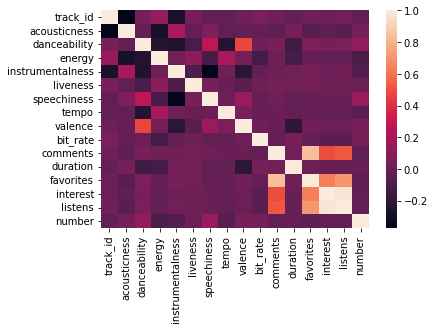

In [11]:
sns.heatmap(mergedDF.corr())

### Since we didn't find any good correlations, so we'll move toward component analysis (PCA) by scaling the features

In [12]:
features = ['acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence']
# reqs = ['track_id','genre_top','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence']
X = mergedDF[features].values
y = mergedDF['genre_top'].values

In [13]:
sc = StandardScaler()
transformed_X = sc.fit_transform(X)

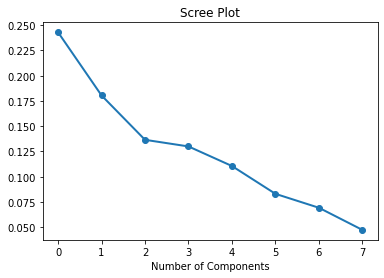

In [14]:
pca = PCA()

pca.fit(transformed_X)
cum_exp_plts = pca.explained_variance_ratio_

plt.plot(range(pca.n_components_), cum_exp_plts, 'o-', linewidth = 2)
plt.xlabel('Number of Components')
plt.title("Scree Plot")
plt.show()

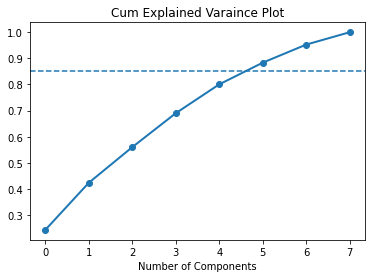

In [15]:
cumulativeSum = cum_exp_plts.cumsum()
plt.plot(range(pca.n_components_), cumulativeSum, 'o-', linewidth = 2)
plt.axhline(0.85, linestyle='--')
plt.xlabel('Number of Components')
plt.title("Cum Explained Varaince Plot")
plt.show()

#### Considering all features below the line

In [16]:
cumulativeSum

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

### Decision Tree

In [17]:
DecTree = DecisionTreeClassifier(random_state=42)
pca = PCA(n_components=5 , random_state=42)
X_train, X_test, train_y, test_y = train_test_split(transformed_X, y, random_state=42)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)
DecTree.fit(pca_X_train, train_y)
TreePrediction = DecTree.predict(pca_X_test) 

In [18]:
TreePrediction

array(['Rock', 'Rock', 'Hip-Hop', ..., 'Rock', 'Rock', 'Hip-Hop'],
      dtype=object)

### Logistic Regression

In [19]:
logreg = LogisticRegression(random_state=42)
logreg.fit(pca_X_train, train_y)
LogPrediction = logreg.predict(pca_X_test)

In [20]:
LogPrediction

array(['Rock', 'Rock', 'Hip-Hop', ..., 'Rock', 'Hip-Hop', 'Hip-Hop'],
      dtype=object)

### Classification Report For Decision Tree and Logistic Regression

In [21]:
TreeReport = classification_report(TreePrediction, test_y)
LogReport = classification_report(LogPrediction, test_y)

print("Decision Tree\n",TreeReport)
print("Logistic Regression\n",LogReport)

Decision Tree
               precision    recall  f1-score   support

     Hip-Hop       0.59      0.61      0.60       215
        Rock       0.91      0.91      0.91       986

    accuracy                           0.85      1201
   macro avg       0.75      0.76      0.76      1201
weighted avg       0.86      0.85      0.85      1201

Logistic Regression
               precision    recall  f1-score   support

     Hip-Hop       0.54      0.77      0.63       157
        Rock       0.96      0.90      0.93      1044

    accuracy                           0.88      1201
   macro avg       0.75      0.84      0.78      1201
weighted avg       0.91      0.88      0.89      1201



#### As seen the results for Rock are better than Hip-Hop in both models, and the reason behind this is unbalanced Data for hiphop against Rock

In [22]:
hiphopData = mergedDF[mergedDF['genre_top']=='Hip-Hop']
RockData = mergedDF[mergedDF['genre_top']=='Rock']

print("HipHop Length: ", len(hiphopData))
print("Rock Length: ", len(RockData))

HipHop Length:  910
Rock Length:  3892


In [23]:
RockData = RockData.sample(n=len(hiphopData))
len(RockData)

910

### DataFrame Containing equal results for HipHop and Rock

In [24]:
mergedDF = pd.concat([hiphopData,RockData])
len(mergedDF)

1820

### Repeating the same above process

In [25]:
X = mergedDF[features].values
y = mergedDF['genre_top'].values
transformed_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [26]:
DecTree = DecisionTreeClassifier(random_state=42)
DecTree.fit(X_pca_train,y_train)
TreePrediction = DecTree.predict(X_pca_test)

In [27]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)
logregPrediction = logreg.predict(X_test)

### Classification Report for both models

In [28]:
TreeReport = classification_report(TreePrediction, y_test)
LogReport = classification_report(logregPrediction, y_test)

print("Decision Tree\n",TreeReport)
print("Logistic Regression\n",LogReport)

Decision Tree
               precision    recall  f1-score   support

     Hip-Hop       0.79      0.76      0.77       242
        Rock       0.74      0.77      0.75       213

    accuracy                           0.76       455
   macro avg       0.76      0.77      0.76       455
weighted avg       0.77      0.76      0.77       455

Logistic Regression
               precision    recall  f1-score   support

     Hip-Hop       0.86      0.87      0.87       231
        Rock       0.86      0.86      0.86       224

    accuracy                           0.86       455
   macro avg       0.86      0.86      0.86       455
weighted avg       0.86      0.86      0.86       455



#### As seen, Logistic Regression performs slight better

In [29]:
kfolds = KFold(10)
TreeScore = cross_val_score(DecTree,transformed_X,y,cv=kfolds)
LogScore = cross_val_score(logreg,transformed_X,y,cv=kfolds)
print("Decision Tree: ",np.mean(TreeScore),"Logistic Regression: ", np.mean(LogScore))

Decision Tree:  0.8131868131868132 Logistic Regression:  0.8203296703296704
